[Week 02] Jinkyu Lee

파이썬 머신러닝 완벽 가이드 3장 참고

# Evaluation

* 이진 분류의 평가 방법

## Accuracy

* Accuracy = 참 값의 데이터 수 / 전체 예측 데이터 수

* 직관적으로 모델 예측 성능을 나타내는 평가 지표

* 불균형한 레이블 값 분포에서는 모델의 성능을 왜곡할 수 있음

### Example

* MNIST 데이터를 예시로 불균형한 레이블 값 분포에서 발생하는 왜곡을 확인해보자

* 7인 것만 True, 나머지 값은 모두 False로 변환하여 이진 분류 문제로 설정

In [47]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator):
    def fit(self, X, y):
        pass
    
    # 입력값으로 들어오는 X 데이터 세트의 크기만큼 모두 0값으로 만들어서 반환
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)
    
# 사이킷런의 내장 데이터 세트인 load_digits()를 이용해 MNIST 데이터 로딩
digits = load_digits()

# digits 번호가 7번이면 True이고 이를 astype(int)로 1로 변환, 7번이 아니면 False이고 0으로 변환
y = (digits.target == 7).astype(int)
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=11)

# 불균형한 레이블 데이터 분포도 확인
print('레이블 테스트 세트 크기 :', y_test.shape)
print('테스트 세트 레이블 0과 1의 분포도')
print(pd.Series(y_test).value_counts())

# Dummy Classifier로 학습/예측/정확도 평가
fakeclf = MyFakeClassifier()
fakeclf.fit(X_train, y_train)
fakepred = fakeclf.predict(X_test)
print('모든 예측을 0으로 하여도 정확도는: {:.3f}'.format(accuracy_score(y_test, fakepred)))

레이블 테스트 세트 크기 : (450,)
테스트 세트 레이블 0과 1의 분포도
0    405
1     45
dtype: int64
모든 예측을 0으로 하여도 정확도는: 0.900


* 모두 0으로 predict함에도 정확도는 90%임

* 이러한 한계점을 극복하기 위해 여러 가지 분류 지표를 함께 적용하여 모델 성능을 평가해야 함

## Confusion matrix

![](https://velog.velcdn.com/images%2Fsset2323%2Fpost%2F2fb704cf-8556-40fc-87a2-75b8feb32986%2Fimage.png)

* 어떤 유형의 예측 오류가 발생하는지

In [48]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, fakepred)

array([[405,   0],
       [ 45,   0]], dtype=int64)

* Accuracy = (TN + TP) / (TN + FP + FN + TP)

## Precision and recall

* Precision = TP / (FP + TP)

    * 예측을 positive로 한 대상 중 예측과 실제값이 positive로 일치한 데이터의 비율

    * 실제 negative인 데이터 예측을 positive로 잘못 판단하게 되면(FP) 큰 문제가 되는 경우에 더 중요한 지표로 작용 (e.g. 스팸메일 여부 판단)

* Recall = TP / (FN + TP)

    * 실제 값이 positive인 대상 중 예측과 실제 값이 positive로 일치한 데이터의 비율

    * 실제 positive인 데이터 예측을 negative로 잘못 판단하게 되면(FN) 큰 문제가 되는 경우에 더 중요한 지표로 작용 (e.g. 암 진단, 금융 사기 적발)

In [49]:
import re
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy, precision, recall))

In [50]:
# 기본 데이터 정리 및 처리
import numpy as np
import pandas as pd

# 경고 제거 (판다스가 에러 메세지를 자주 만들어 내기 때문에 이를 일단 무시하도록 설정합니다.)
import sys
import warnings

import warnings
warnings.filterwarnings('ignore')

titanic_df = pd.read_csv('../../input/titanic/train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)

# Initial 처리
X_titanic_df['Initial'] = 0
X_titanic_df['Initial'] = X_titanic_df.Name.str.extract('([A-Za-z]+)\.')
X_titanic_df['Initial'].replace(['Capt', 'Col', 'Countess', 'Don', 'Dona' , 'Dr', 'Jonkheer', 'Lady', 'Major', 'Master',  'Miss'  ,'Mlle', 'Mme', 'Mr', 'Mrs', 'Ms', 'Rev', 'Sir'], ['Sacrificed', 'Respected', 'Nobles', 'Mr', 'Mrs', 'Respected', 'Mr', 'Nobles', 'Respected', 'Kids', 'Miss', 'Nobles', 'Nobles', 'Mr', 'Mrs', 'Nobles', 'Sacrificed', 'Nobles'], inplace=True)
X_titanic_df['Initial'].replace(['Kids', 'Miss', 'Mr', 'Mrs', 'Nobles', 'Respected', 'Sacrificed'], [4, 4, 2, 5, 6, 3, 1], inplace=True)
X_titanic_df['LastName'] = X_titanic_df.Name.str.extract('([A-Za-z]+)')
X_titanic_df.loc[X_titanic_df['Initial'] == 'Dona', 'Initial'] = 'Mrs'
X_titanic_df['NumName'] = X_titanic_df['LastName'].factorize()[0]

# Age 처리
X_titanic_df = X_titanic_df.reset_index(drop=True)
X_titanic_df['Age'] = X_titanic_df.groupby('Initial')['Age'].apply(lambda x: x.fillna(x.mean()))
X_titanic_df['Age_Range'] = pd.qcut(X_titanic_df['Age'], 10)
X_titanic_df['Agroup'] = 0
X_titanic_df.loc[X_titanic_df['Age'] < 1.0, 'Agroup'] = 1
X_titanic_df.loc[(X_titanic_df['Age'] >=1.0) & (X_titanic_df['Age'] <= 3.0), 'Agroup'] = 2
X_titanic_df.loc[(X_titanic_df['Age'] > 3.0) & (X_titanic_df['Age'] < 11.0), 'Agroup'] = 7
X_titanic_df.loc[(X_titanic_df['Age'] >= 11.0) & (X_titanic_df['Age'] < 15.0), 'Agroup'] = 13
X_titanic_df.loc[(X_titanic_df['Age'] >= 15.0) & (X_titanic_df['Age'] < 18.0), 'Agroup'] = 16
X_titanic_df.loc[(X_titanic_df['Age'] >= 18.0) & (X_titanic_df['Age'] <=  20.0), 'Agroup'] = 18
X_titanic_df.loc[(X_titanic_df['Age'] > 20.0) & (X_titanic_df['Age'] <= 22.0), 'Agroup'] = 21
X_titanic_df.loc[(X_titanic_df['Age'] > 22.0) & (X_titanic_df['Age'] <= 26.0), 'Agroup'] = 24
X_titanic_df.loc[(X_titanic_df['Age'] > 26.0) & (X_titanic_df['Age'] <= 30.0), 'Agroup'] = 28
X_titanic_df.loc[(X_titanic_df['Age'] > 30.0) & (X_titanic_df['Age'] <= 32.0), 'Agroup'] = 31
X_titanic_df.loc[(X_titanic_df['Age'] > 32.0) & (X_titanic_df['Age'] <= 34.0), 'Agroup'] = 33
X_titanic_df.loc[(X_titanic_df['Age'] > 34.0) & (X_titanic_df['Age'] <= 38.0), 'Agroup'] = 36
X_titanic_df.loc[(X_titanic_df['Age'] > 38.0) & (X_titanic_df['Age'] <= 52.0), 'Agroup'] = 45
X_titanic_df.loc[(X_titanic_df['Age'] > 52.0) & (X_titanic_df['Age'] <= 75.0), 'Agroup'] = 60
X_titanic_df.loc[X_titanic_df['Age'] > 75.0, 'Agroup'] = 78

# Sex 처리
X_titanic_df.loc[(X_titanic_df['Sex'] == 'male'), 'Sex'] = 1
X_titanic_df.loc[(X_titanic_df['Sex'] == 'female'), 'Sex'] = 2
X_titanic_df.loc[(X_titanic_df['Age'] < 1), 'Sex'] = 3

# Family 처리
X_titanic_df.loc[(X_titanic_df['SibSp'] == 0) & (X_titanic_df['Parch'] == 0), 'Alone'] = 1
X_titanic_df['Family'] = X_titanic_df['Parch'] + X_titanic_df['SibSp'] + 1

# Fare 처리
X_titanic_df['Fgroup'] = 0
X_titanic_df.loc[X_titanic_df['Fare'] <= 0,'Fgroup'] = 0
X_titanic_df.loc[(X_titanic_df['Fare'] > 0) & (X_titanic_df['Fare'] <= 7.125), 'Fgroup'] = 1
X_titanic_df.loc[(X_titanic_df['Fare'] > 7.125) & (X_titanic_df['Fare'] <= 7.9), 'Fgroup'] = 2
X_titanic_df.loc[(X_titanic_df['Fare'] > 7.9) & (X_titanic_df['Fare'] <= 8.03), 'Fgroup'] = 3
X_titanic_df.loc[(X_titanic_df['Fare'] > 8.03) & (X_titanic_df['Fare'] < 10.5), 'Fgroup'] = 4
X_titanic_df.loc[(X_titanic_df['Fare'] >= 10.5) & (X_titanic_df['Fare'] < 23.0), 'Fgroup'] = 5
X_titanic_df.loc[(X_titanic_df['Fare'] >= 23.0) & (X_titanic_df['Fare'] <= 27.8), 'Fgroup'] = 6
X_titanic_df.loc[(X_titanic_df['Fare'] > 27.8) & (X_titanic_df['Fare'] <= 51.0), 'Fgroup'] = 7
X_titanic_df.loc[(X_titanic_df['Fare'] > 51.0) & (X_titanic_df['Fare'] <= 73.5), 'Fgroup'] = 8
X_titanic_df.loc[X_titanic_df['Fare'] > 73.5, 'Fgroup'] = 9

X_titanic_df['F1'] = X_titanic_df['Agroup']
X_titanic_df['F2'] = X_titanic_df['Initial']
X_titanic_df['F3'] = X_titanic_df['Fgroup']
X_titanic_df['F4'] = X_titanic_df['Family']
X_titanic_df['F5'] = X_titanic_df['Sex']
X_titanic_df['F6'] = X_titanic_df['Pclass']
good_columns = ['F1', 'F2', 'F3', 'F4', 'F5', 'F6']

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df[good_columns], y_titanic_df, test_size = 0.20, random_state=11)


In [51]:
# 로지스틱 회귀 기반으로 타이타닉 생존자를 예측하고, confusion matrix, accuracy, precision, recall 평가를 해보자

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear')

lr_clf.fit(X_train, y_train)

pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

오차 행렬
[[108  10]
 [ 12  49]]
정확도: 0.8771, 정밀도: 0.8305, 재현율: 0.8033


### Precison / recall trade-off

* 분류 결정 threshold 조정

In [52]:
pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)
print('pred_proba() 결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

# 예측 확률 array 와 예측 결과값 array 를 concatenate 하여 예측 확률과 결과값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba , pred.reshape(-1,1)], axis=1)
print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n', pred_proba_result[:3])

pred_proba() 결과 Shape : (179, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.2820151  0.7179849 ]
 [0.88942979 0.11057021]
 [0.92600838 0.07399162]]
두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.2820151  0.7179849  1.        ]
 [0.88942979 0.11057021 0.        ]
 [0.92600838 0.07399162 0.        ]]


In [53]:
from sklearn.preprocessing import Binarizer

X = [[ 1, -1,  2],
     [ 2,  0,  0],
     [ 0,  1.1, 1.2]]

# threshold 기준값보다 같거나 작으면 0을, 크면 1을 반환
binarizer = Binarizer(threshold=1.1)                     
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [54]:
# 분류 결정 임계값 0.5 기반에서 Binarizer를 이용하여 예측값 변환

#Binarizer의 threshold 설정값. 분류 결정 임곗값임.  
custom_threshold = 0.5

# predict_proba( ) 반환값의 두번째 컬럼 , 즉 Positive 클래스 컬럼 하나만 추출하여 Binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[108  10]
 [ 12  49]]
정확도: 0.8771, 정밀도: 0.8305, 재현율: 0.8033


In [55]:
# Binarizer의 threshold 설정값을 0.4로 설정. 즉 분류 결정 임곗값을 0.5에서 0.4로 낮춤  
custom_threshold = 0.4
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test , custom_predict)

오차 행렬
[[104  14]
 [  8  53]]
정확도: 0.8771, 정밀도: 0.7910, 재현율: 0.8689


In [56]:
# 여러개의 분류 결정 임곗값을 변경하면서 Binarizer를 이용하여 예측값 변환

thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]

def get_eval_by_threshold(y_test , pred_proba_c1, thresholds):
    # thresholds list객체내의 값을 차례로 iteration하면서 Evaluation 수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1) 
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:',custom_threshold)
        get_clf_eval(y_test , custom_predict)

get_eval_by_threshold(y_test ,pred_proba[:,1].reshape(-1,1), thresholds )

임곗값: 0.4
오차 행렬
[[104  14]
 [  8  53]]
정확도: 0.8771, 정밀도: 0.7910, 재현율: 0.8689
임곗값: 0.45
오차 행렬
[[105  13]
 [ 10  51]]
정확도: 0.8715, 정밀도: 0.7969, 재현율: 0.8361
임곗값: 0.5
오차 행렬
[[108  10]
 [ 12  49]]
정확도: 0.8771, 정밀도: 0.8305, 재현율: 0.8033
임곗값: 0.55
오차 행렬
[[110   8]
 [ 14  47]]
정확도: 0.8771, 정밀도: 0.8545, 재현율: 0.7705
임곗값: 0.6
오차 행렬
[[111   7]
 [ 16  45]]
정확도: 0.8715, 정밀도: 0.8654, 재현율: 0.7377


In [57]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1] 

# 실제값 데이터 셋과 레이블 값이 1일 때의 예측 확률을 precision_recall_curve 인자로 입력 
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print('반환된 분류 결정 임곗값 배열의 Shape:', thresholds.shape)
print('반환된 precisions 배열의 Shape:', precisions.shape)
print('반환된 recalls 배열의 Shape:', recalls.shape)

print("thresholds 5 sample:", thresholds[:5])
print("precisions 5 sample:", precisions[:5])
print("recalls 5 sample:", recalls[:5])

#반환된 임계값 배열 로우가 147건이므로 샘플로 8건만 추출하되, 임곗값을 15 Step으로 추출. 
thr_index = np.arange(0, thresholds.shape[0], 15)
print('샘플 추출을 위한 임계값 배열의 index 8개:', thr_index)
print('샘플용 8개의 임곗값: ', np.round(thresholds[thr_index], 2))

# 15 step 단위로 추출된 임계값에 따른 정밀도와 재현율 값 
print('샘플 임계값별 정밀도: ', np.round(precisions[thr_index], 3))
print('샘플 임계값별 재현율: ', np.round(recalls[thr_index], 3))

반환된 분류 결정 임곗값 배열의 Shape: (113,)
반환된 precisions 배열의 Shape: (114,)
반환된 recalls 배열의 Shape: (114,)
thresholds 5 sample: [0.07399162 0.07536269 0.0789755  0.07916802 0.08101948]
precisions 5 sample: [0.38853503 0.4137931  0.41666667 0.41258741 0.41428571]
recalls 5 sample: [1.         0.98360656 0.98360656 0.96721311 0.95081967]
샘플 추출을 위한 임계값 배열의 index 8개: [  0  15  30  45  60  75  90 105]
샘플용 8개의 임곗값:  [0.07 0.11 0.18 0.28 0.49 0.68 0.83 0.95]
샘플 임계값별 정밀도:  [0.389 0.467 0.56  0.671 0.833 0.902 0.92  1.   ]
샘플 임계값별 재현율:  [1.    0.934 0.918 0.902 0.82  0.607 0.377 0.164]


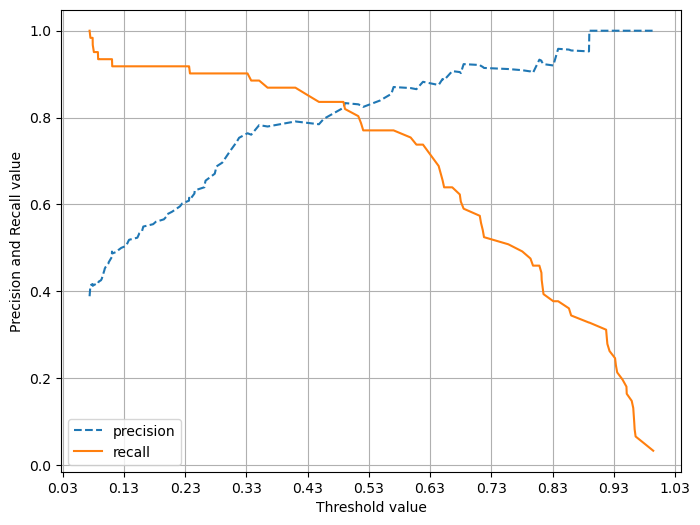

In [58]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test , pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8, 6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot( y_test, lr_clf.predict_proba(X_test)[:, 1] )

### Precision과 recall의 맹점

#### Precision이 100%가 되는 방법

* 확실한 기준이 되는 경우만 positive로 예측하고 나머지는 모두 negative로 예측

* 예를 들어 암 진단에서 80세 이상이고, 비만이며, 이전에 암 진단을 받았고, 암 세포의 크기가 상위 0.1% 이상이면 무조건 positive, 나머지는 negative로 예측

* Precision = TP / (TP + FP)
    * FP = 0 -> Precision = 100%

#### Recall이 100%가 되는 방법

* 모든 환자를 positive로 예측

* Recall = TP / (TP + FN)
    * FN = 0 -> Recall = 100%

## F1 score

* Precision과 recall을 결합한 지표

* Presicion과 recall이 어느 한 쪽으로 치우치지 않는 경우 상대적으로 높은 값을 가짐

![](https://velog.velcdn.com/images%2Fjadon%2Fpost%2Ff06f1d40-605d-4f13-b6ce-35c220c82968%2Fimage.png)

In [59]:
from sklearn.metrics import f1_score 
f1 = f1_score(y_test , pred)
print('F1 스코어: {0:.4f}'.format(f1))

F1 스코어: 0.8167


In [60]:
def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    # F1 스코어 추가
    f1 = f1_score(y_test,pred)
    print('오차 행렬')
    print(confusion)
    # f1 score print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}'.format(accuracy, precision, recall, f1))

thresholds = [0.4 , 0.45 , 0.50 , 0.55 , 0.60]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.4
오차 행렬
[[104  14]
 [  8  53]]
정확도: 0.8771, 정밀도: 0.7910, 재현율: 0.8689, F1:0.8281
임곗값: 0.45
오차 행렬
[[105  13]
 [ 10  51]]
정확도: 0.8715, 정밀도: 0.7969, 재현율: 0.8361, F1:0.8160
임곗값: 0.5
오차 행렬
[[108  10]
 [ 12  49]]
정확도: 0.8771, 정밀도: 0.8305, 재현율: 0.8033, F1:0.8167
임곗값: 0.55
오차 행렬
[[110   8]
 [ 14  47]]
정확도: 0.8771, 정밀도: 0.8545, 재현율: 0.7705, F1:0.8103
임곗값: 0.6
오차 행렬
[[111   7]
 [ 16  45]]
정확도: 0.8715, 정밀도: 0.8654, 재현율: 0.7377, F1:0.7965


## ROC and AUC

### ROC(receiver operation characteristic curve)

* FPR(false positive rate)이 변할 때 TPR(true positive rate)이 어떻게 변하는지를 나타내는 곡선

* TPR = sensitivity = recall

* TNR (true negative rate) = specificity = TN / (FP + TN)

* FPR = FP / (FP + TN) = 1 - TNR = 1 - specificity

In [61]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1] 

fprs , tprs , thresholds = roc_curve(y_test, pred_proba_class1)
# 반환된 임곗값 배열에서 샘플로 데이터를 추출하되, 임곗값을 5 Step으로 추출. 
# thresholds[0]은 max(예측확률)+1로 임의 설정됨. 이를 제외하기 위해 np.arange는 1부터 시작
thr_index = np.arange(1, thresholds.shape[0], 5)
print('샘플 추출을 위한 임곗값 배열의 index:', thr_index)
print('샘플 index로 추출한 임곗값: ', np.round(thresholds[thr_index], 2))

# 5 step 단위로 추출된 임계값에 따른 FPR, TPR 값
print('샘플 임곗값별 FPR: ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR: ', np.round(tprs[thr_index], 3))

샘플 추출을 위한 임곗값 배열의 index: [ 1  6 11 16 21 26 31 36 41 46 51 56 61]
샘플 index로 추출한 임곗값:  [0.99 0.84 0.68 0.62 0.49 0.35 0.29 0.24 0.14 0.1  0.09 0.07 0.  ]
샘플 임곗값별 FPR:  [0.    0.008 0.034 0.051 0.093 0.127 0.203 0.297 0.441 0.559 0.678 0.814
 1.   ]
샘플 임곗값별 TPR:  [0.033 0.377 0.607 0.738 0.836 0.885 0.902 0.918 0.918 0.934 0.951 1.
 1.   ]


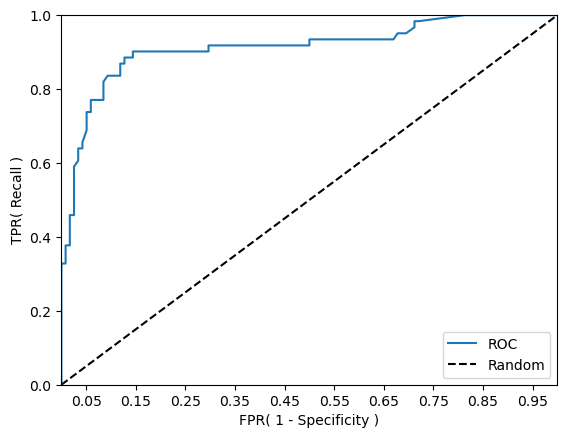

In [62]:
def roc_curve_plot(y_test , pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환 받음. 
    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1)

    # ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
    # 가운데 대각선 직선을 그림. 
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    
    # FPR X 축의 Scale을 0.1 단위로 변경, X,Y 축명 설정등   
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Specificity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1] )

### AUC(area under curve)

* ROC 곡선 밑의 면적

* 1에 가까울수록 좋은 수치

* 가운데 대각선 직선은 랜덤 수준의 분류기

In [63]:
from sklearn.metrics import roc_auc_score
pred_proba = lr_clf.predict_proba(X_test)[:, 1]
roc_score = roc_auc_score(y_test, pred_proba)
print('ROC AUC 값: {0:.4f}'.format(roc_score))

ROC AUC 값: 0.9128


In [64]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
          F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))